# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/house_prices.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/house_prices.parquet')

In [5]:
y_train = train.SalePrice
X_train = train.drop(columns=['SalePrice'])

In [6]:
y_validation = validation.SalePrice
X_validation = validation.drop(columns=['SalePrice'])

In [7]:
y_train_scaled = y_train/1000
y_validation_scaled = y_validation/1000

In [8]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [10, 25, 50, 100, 200, 300]
exploratory_learn_rate = [0.01, 0.05, 0.1, 0.5]

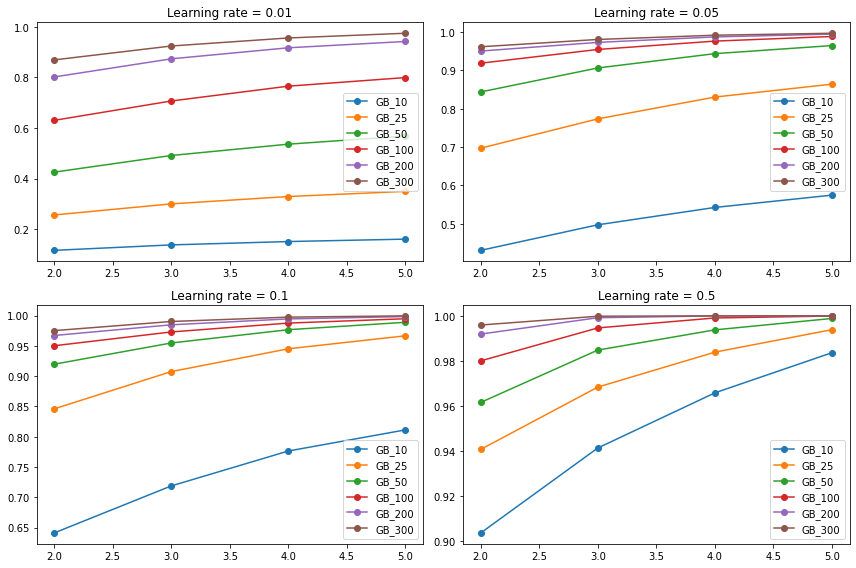

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingRegressor(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train_scaled).score(X_train, y_train_scaled) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [15]:
max_depth = [1, 2, 3, 4]
n_estimators = [25, 50, 75, 100, 125, 150, 200, 250, 300, 400]
learn_rate = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1]

In [16]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingRegressor(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [17]:
metrics = regression(models_list, names_list, '../../../data/metrics/house_prices/gradient_boosting.csv', X_train, y_train_scaled, X_validation, y_validation_scaled, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_25_1_0.001,0.100757,78.100801,80.973382,3.678042
GB_25_1_0.002,0.091727,77.261349,80.132803,3.716547
GB_25_1_0.005,0.092752,74.909661,77.745948,3.786277
GB_25_1_0.01,0.091754,71.410160,74.155271,3.844147
GB_25_1_0.05,0.091787,53.892845,58.058604,7.729707
...,...,...,...,...
GB_400_4_0.002,5.466960,43.656900,50.120945,14.806469
GB_400_4_0.005,5.514151,22.684052,34.363438,51.487210
GB_400_4_0.01,5.574365,13.658509,29.796271,118.151719
GB_400_4_0.05,5.504061,5.913008,28.362169,379.657198


In [27]:
metrics[metrics['delta%']<25].sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
GB_250_2_0.01,1.811663,31.355061,38.035186,21.304773
GB_50_2_0.05,0.304188,31.188510,38.110833,22.195105
GB_25_2_0.1,0.196447,30.992319,38.136498,23.051453
GB_50_1_0.1,0.170543,33.219507,39.648733,19.353766
GB_100_1_0.05,0.327098,33.362101,40.341954,20.921502
...,...,...,...,...
GB_50_1_0.001,0.168538,77.262172,80.133628,3.716509
GB_25_4_0.001,0.298178,77.361897,80.335793,3.844135
GB_25_3_0.001,0.246342,77.505380,80.420131,3.760708
GB_25_2_0.001,0.157573,77.744650,80.789693,3.916724


Let's continue with **GB_250_2_0.1** and let's see how does it perform in the retrain

In [22]:
test =  pd.read_parquet('../../../data/model_input/test_sets/house_prices.parquet')

In [23]:
y_test = test.SalePrice
X_test = test.drop(columns=['SalePrice'])

In [24]:
retrain = pd.concat([train, validation])

In [25]:
y_retrain = retrain.SalePrice
X_retrain = retrain.drop(columns=['SalePrice'])

In [26]:
y_retrain_scaled = y_retrain/1000
y_test_scaled = y_test/1000

In [28]:
model = GradientBoostingRegressor(n_estimators=250, max_depth=2, learning_rate=0.1).fit(X_retrain, y_retrain_scaled)

In [31]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test_scaled, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 21.9205


Good news, the model generalizes better

In [34]:
dump(model, 'best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [35]:
with open('../../../data/metrics/house_prices/final_RMSE.txt', 'a') as f:
    f.write('\nGB, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_13492/3867665254.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],


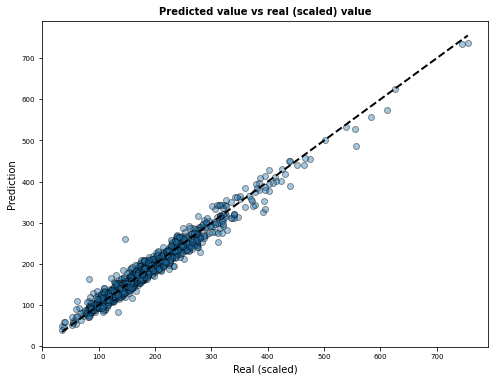

In [36]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain_scaled

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain_scaled, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain_scaled.min(), y_retrain_scaled.max()], [y_retrain_scaled.min(), y_retrain_scaled.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real (scaled) value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real (scaled)')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)